## Introduction

You area junior data analyst working in the marketing analyst team at Cyclistic,a bike-share company in Chicago.The director of marketing believes the company’s future success depends on maximizing the number of annual memberships.Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently.From these insights,your team will design a new marketing strategy to convert casual riders in to annual members.But first,Cyclistic executives must approve your recommendations,so they must be backed up withcompelling data insights and professional data visualizations.

## About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

## Consider key stakeholders.
Key stakeholders include: Cyclistic executive team, Director of Marketing (Lily Moreno), Marketing Analytics team.

## Ask

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members.<br>
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

## Prepare

__For the purposes of this case study,__<br>
the datasets are appropriate and will enable you to answer the business questions. The data has been made available by
[Motivate International Inc.](https://divvy-tripdata.s3.amazonaws.com/index.html) This is public data that you can use to explore how different customer types are using Cyclistic bikes.

__Download data and store it appropriately.__<br>
Data has been downloaded from [Motivate International Inc.](https://divvy-tripdata.s3.amazonaws.com/index.html) Local copies have been stored securely on Google Drive and here on Kaggle.

__Identify how it’s organized.__<br>
All trip data is in comma-delimited (.CSV) format with 15 columns, including: ride ID #, ride type, start/end time, ride length (in minutes), day of the week, starting point (code, name, and latitude/longitude), ending point (code, name, and latitude/longitude), and member/casual rider.

__Determine the credibility of the data.__<br>
Due to the fact that this is a case study using public data, we are going to assume the data is credible.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
%matplotlib inline

## Process
__Check the data for errors.__<br>
The code chunk below will import 3 individual .csv files as data frames, each representing 1 of the last 3 months of trip data in 2022. Some parsing errors persist, however, they represent less 0.25% of the data set, so this is still a representative sample.

__Choose your tools.__<br>
For this analysis, we will be using Python for it's easy statistical analysis tools and data visualizations.

In [71]:
jan_df = pd.read_csv('202201-divvy-tripdata.csv')
feb_df = pd.read_csv('202202-divvy-tripdata.csv')
mar_df = pd.read_csv('202203-divvy-tripdata.csv')

In [72]:
jan_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103765,8788DA3EDE8FD8AB,electric_bike,2022-01-18 12:36:48,2022-01-18 12:46:19,Clinton St & Washington Blvd,WL-012,NaN,NaN,41.883436,-87.641391,41.890000,-87.620000,casual
103766,C6C3B64FDC827D8C,electric_bike,2022-01-27 11:00:06,2022-01-27 11:02:40,Racine Ave & Randolph St,13155,NaN,NaN,41.884158,-87.656977,41.880000,-87.650000,casual
103767,CA281AE7D8B06F5A,electric_bike,2022-01-10 16:14:51,2022-01-10 16:20:58,Broadway & Waveland Ave,13325,Clark St & Grace St,TA1307000127,41.949066,-87.648611,41.950780,-87.659172,casual
103768,44E348991862319B,electric_bike,2022-01-19 13:22:11,2022-01-19 13:24:27,Racine Ave & Randolph St,13155,NaN,NaN,41.884005,-87.657031,41.880000,-87.660000,casual


Aggregate your data so it’s useful and accessible.
This code chunk will combine the 3 individual data frames into one large data frame for analysis.

In [73]:
# Create a list of dataframes
dfs = [jan_df, feb_df, mar_df]

In [74]:
# Concatenate the list of dataframes
merged_df = pd.concat(dfs, ignore_index=True)

In [75]:
merged_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual
503417,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual
503418,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member
503419,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member


In [76]:
merged_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [77]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503421 entries, 0 to 503420
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             503421 non-null  object 
 1   rideable_type       503421 non-null  object 
 2   started_at          503421 non-null  object 
 3   ended_at            503421 non-null  object 
 4   start_station_name  421335 non-null  object 
 5   start_station_id    421335 non-null  object 
 6   end_station_name    413982 non-null  object 
 7   end_station_id      413982 non-null  object 
 8   start_lat           503421 non-null  float64
 9   start_lng           503421 non-null  float64
 10  end_lat             502992 non-null  float64
 11  end_lng             502992 non-null  float64
 12  member_casual       503421 non-null  object 
dtypes: float64(4), object(9)
memory usage: 49.9+ MB


In [78]:
# Convert 'started_at' and 'ended_at' to datetime format
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'])
merged_df['ended_at'] = pd.to_datetime(merged_df['ended_at'])

# Calculate the duration and add it to a new column 'ride_length'
merged_df['ride_length'] = (merged_df['ended_at'] - merged_df['started_at'])

In [79]:
merged_df['ride_length'] = merged_df['ride_length'].dt.total_seconds()

In [80]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503421 entries, 0 to 503420
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             503421 non-null  object        
 1   rideable_type       503421 non-null  object        
 2   started_at          503421 non-null  datetime64[ns]
 3   ended_at            503421 non-null  datetime64[ns]
 4   start_station_name  421335 non-null  object        
 5   start_station_id    421335 non-null  object        
 6   end_station_name    413982 non-null  object        
 7   end_station_id      413982 non-null  object        
 8   start_lat           503421 non-null  float64       
 9   start_lng           503421 non-null  float64       
 10  end_lat             502992 non-null  float64       
 11  end_lng             502992 non-null  float64       
 12  member_casual       503421 non-null  object        
 13  ride_length         503421 no

In [81]:
# Extract date, month, day, and year and add them to new columns
merged_df['date'] = merged_df['started_at'].dt.date
merged_df['month'] = merged_df['started_at'].dt.month
merged_df['day'] = merged_df['started_at'].dt.day
merged_df['year'] = merged_df['started_at'].dt.year

In [82]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,date,month,day,year
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,177.0,2022-01-13,1,13,2022
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,261.0,2022-01-10,1,10,2022
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,261.0,2022-01-25,1,25,2022
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,896.0,2022-01-04,1,4,2022
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,362.0,2022-01-20,1,20,2022


In [83]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503421 entries, 0 to 503420
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             503421 non-null  object        
 1   rideable_type       503421 non-null  object        
 2   started_at          503421 non-null  datetime64[ns]
 3   ended_at            503421 non-null  datetime64[ns]
 4   start_station_name  421335 non-null  object        
 5   start_station_id    421335 non-null  object        
 6   end_station_name    413982 non-null  object        
 7   end_station_id      413982 non-null  object        
 8   start_lat           503421 non-null  float64       
 9   start_lng           503421 non-null  float64       
 10  end_lat             502992 non-null  float64       
 11  end_lng             502992 non-null  float64       
 12  member_casual       503421 non-null  object        
 13  ride_length         503421 no

In [84]:
# Extract day of the week
merged_df['day_of_week'] = merged_df['started_at'].dt.dayofweek

# Adjust the mapping so 1 = Sunday and 7 = Saturday
merged_df['day_of_week'] = (merged_df['day_of_week'] + 1) % 7 + 1

In [85]:
merged_df[['started_at', 'day_of_week']].head()

,started_at,day_of_week
0,2022-01-13 11:59:47,5
1,2022-01-10 08:41:56,2
2,2022-01-25 04:53:40,3
3,2022-01-04 00:18:04,3
4,2022-01-20 01:31:10,5


In [86]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503421 entries, 0 to 503420
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             503421 non-null  object        
 1   rideable_type       503421 non-null  object        
 2   started_at          503421 non-null  datetime64[ns]
 3   ended_at            503421 non-null  datetime64[ns]
 4   start_station_name  421335 non-null  object        
 5   start_station_id    421335 non-null  object        
 6   end_station_name    413982 non-null  object        
 7   end_station_id      413982 non-null  object        
 8   start_lat           503421 non-null  float64       
 9   start_lng           503421 non-null  float64       
 10  end_lat             502992 non-null  float64       
 11  end_lng             502992 non-null  float64       
 12  member_casual       503421 non-null  object        
 13  ride_length         503421 no

Let's next remove the NA rows.

In [87]:
merged_df_no_na = merged_df.dropna()

In [88]:
merged_df_no_na

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,date,month,day,year,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,177.0,2022-01-13,1,13,2022,5
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,261.0,2022-01-10,1,10,2022,2
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,261.0,2022-01-25,1,25,2022,3
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,896.0,2022-01-04,1,4,2022,3
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,362.0,2022-01-20,1,20,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,644.0,2022-03-21,3,21,2022,2
503415,A2A6F07D3DF4D0D6,electric_bike,2022-03-09 20:29:48,2022-03-09 21:01:30,Sheridan Rd & Irving Park Rd,13063,Streeter Dr & Grand Ave,13022,41.954276,-87.654407,41.892278,-87.612043,casual,1902.0,2022-03-09,3,9,2022,4
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,509.0,2022-03-13,3,13,2022,1
503417,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual,2772.0,2022-03-09,3,9,2022,4


Remove negative ride length

In [89]:
merged_trip = merged_df_no_na[merged_df_no_na['ride_length']>0]
merged_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,date,month,day,year,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,177.0,2022-01-13,1,13,2022,5
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,261.0,2022-01-10,1,10,2022,2
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,261.0,2022-01-25,1,25,2022,3
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,896.0,2022-01-04,1,4,2022,3
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,362.0,2022-01-20,1,20,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,644.0,2022-03-21,3,21,2022,2
503415,A2A6F07D3DF4D0D6,electric_bike,2022-03-09 20:29:48,2022-03-09 21:01:30,Sheridan Rd & Irving Park Rd,13063,Streeter Dr & Grand Ave,13022,41.954276,-87.654407,41.892278,-87.612043,casual,1902.0,2022-03-09,3,9,2022,4
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,509.0,2022-03-13,3,13,2022,1
503417,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual,2772.0,2022-03-09,3,9,2022,4


Converting ride length in minutes

In [90]:
merged_trip['ride_length_min'] = (merged_trip['ride_length'] / 60).round(2)


C:\Users\sreza\AppData\Local\Temp\ipykernel_3032\411426625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_trip['ride_length_min'] = (merged_trip['ride_length'] / 60).round(2)


In [91]:
merged_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,date,month,day,year,day_of_week,ride_length_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,177.0,2022-01-13,1,13,2022,5,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,261.0,2022-01-10,1,10,2022,2,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,261.0,2022-01-25,1,25,2022,3,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,896.0,2022-01-04,1,4,2022,3,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,362.0,2022-01-20,1,20,2022,5,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,644.0,2022-03-21,3,21,2022,2,10.73
503415,A2A6F07D3DF4D0D6,electric_bike,2022-03-09 20:29:48,2022-03-09 21:01:30,Sheridan Rd & Irving Park Rd,13063,Streeter Dr & Grand Ave,13022,41.954276,-87.654407,41.892278,-87.612043,casual,1902.0,2022-03-09,3,9,2022,4,31.70
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,509.0,2022-03-13,3,13,2022,1,8.48
503417,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual,2772.0,2022-03-09,3,9,2022,4,46.20


In [92]:
#dropping rows containing Tests in 'start_station_name' column
index_num = merged_trip[merged_trip['start_station_name'].str.contains("TEST" or "test" or "Test")==True].index
merged_trip.drop(index_num)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,date,month,day,year,day_of_week,ride_length_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,177.0,2022-01-13,1,13,2022,5,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,261.0,2022-01-10,1,10,2022,2,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,261.0,2022-01-25,1,25,2022,3,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,896.0,2022-01-04,1,4,2022,3,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,362.0,2022-01-20,1,20,2022,5,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,644.0,2022-03-21,3,21,2022,2,10.73
503415,A2A6F07D3DF4D0D6,electric_bike,2022-03-09 20:29:48,2022-03-09 21:01:30,Sheridan Rd & Irving Park Rd,13063,Streeter Dr & Grand Ave,13022,41.954276,-87.654407,41.892278,-87.612043,casual,1902.0,2022-03-09,3,9,2022,4,31.70
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,509.0,2022-03-13,3,13,2022,1,8.48
503417,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual,2772.0,2022-03-09,3,9,2022,4,46.20


Removing ride length > 1440 minutes as ride length shouldn't be either negative or more than one day

In [93]:
merged_trip = merged_trip[merged_trip['ride_length']<1440.0]

In [94]:
merged_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,date,month,day,year,day_of_week,ride_length_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,177.0,2022-01-13,1,13,2022,5,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,261.0,2022-01-10,1,10,2022,2,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,261.0,2022-01-25,1,25,2022,3,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,896.0,2022-01-04,1,4,2022,3,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,362.0,2022-01-20,1,20,2022,5,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503412,7DF0716EA46DC1E1,classic_bike,2022-03-16 07:34:25,2022-03-16 07:44:58,Stetson Ave & South Water St,TA1308000029,Franklin St & Adams St (Temp),TA1309000008,41.886835,-87.622320,41.879434,-87.635504,member,633.0,2022-03-16,3,16,2022,4,10.55
503413,B591E39220EBC4BC,classic_bike,2022-03-15 18:09:14,2022-03-15 18:20:28,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,41.884241,-87.629634,41.892278,-87.612043,member,674.0,2022-03-15,3,15,2022,3,11.23
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,644.0,2022-03-21,3,21,2022,2,10.73
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,509.0,2022-03-13,3,13,2022,1,8.48


Removing unnecessary columns from our dataframe

In [95]:
merged_trip.drop(['ride_length','day'],axis=1,inplace=True)
merged_trip.head()

C:\Users\sreza\AppData\Local\Temp\ipykernel_3032\531087600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_trip.drop(['ride_length','day'],axis=1,inplace=True)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,5,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,2,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,3,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,3,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,5,6.03


In [96]:
days = {1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday'}

merged_trip['day_of_week'] = merged_trip['day_of_week'].apply(lambda x: days[x])

C:\Users\sreza\AppData\Local\Temp\ipykernel_3032\4279669261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_trip['day_of_week'] = merged_trip['day_of_week'].apply(lambda x: days[x])


In [97]:
merged_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,Thursday,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,Monday,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,Tuesday,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,Tuesday,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,Thursday,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503412,7DF0716EA46DC1E1,classic_bike,2022-03-16 07:34:25,2022-03-16 07:44:58,Stetson Ave & South Water St,TA1308000029,Franklin St & Adams St (Temp),TA1309000008,41.886835,-87.622320,41.879434,-87.635504,member,2022-03-16,3,2022,Wednesday,10.55
503413,B591E39220EBC4BC,classic_bike,2022-03-15 18:09:14,2022-03-15 18:20:28,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,41.884241,-87.629634,41.892278,-87.612043,member,2022-03-15,3,2022,Tuesday,11.23
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,2022-03-21,3,2022,Monday,10.73
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,2022-03-13,3,2022,Sunday,8.48


We have completed our entire data cleaning process

Creating a csv file of the clean data for futher analysis or visualizations in other tools like SQL, Tableau, Power BI, etc.

In [98]:
merged_trip.to_csv('merged_trip.csv',index=False,header=True)

### Analyze 

The dataframe is now ready for descriptive analysis that will help us uncover some insights on how the casual riders and members use Cyclistic rideshare differently.

In [99]:
merged_trip.describe()

,start_lat,start_lng,end_lat,end_lng,month,year,ride_length_min
count,334765.000000,334765.000000,334765.000000,334765.000000,334765.000000,334765.0,334765.000000
mean,41.898537,-87.644445,41.898538,-87.644644,2.319143,2022.0,9.008816
std,0.042200,0.033151,0.041778,0.022938,0.810661,0.0,5.419640
min,41.648600,-87.830000,41.648501,-87.830000,1.000000,2022.0,0.020000
25%,41.880304,-87.657046,41.880317,-87.657659,2.000000,2022.0,4.820000
50%,41.894345,-87.641697,41.894345,-87.641823,3.000000,2022.0,7.770000
75%,41.921822,-87.629879,41.921822,-87.629912,3.000000,2022.0,12.250000
max,45.635034,-73.796477,42.064854,-87.528232,3.000000,2022.0,23.980000


In [100]:
temp_trip = merged_trip.groupby('member_casual')['ride_id'].count().reset_index()

In [101]:
temp_trip

,member_casual,ride_id
0,casual,68324
1,member,266441


In [102]:
merged_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,Thursday,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,Monday,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,Tuesday,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,Tuesday,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,Thursday,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503412,7DF0716EA46DC1E1,classic_bike,2022-03-16 07:34:25,2022-03-16 07:44:58,Stetson Ave & South Water St,TA1308000029,Franklin St & Adams St (Temp),TA1309000008,41.886835,-87.622320,41.879434,-87.635504,member,2022-03-16,3,2022,Wednesday,10.55
503413,B591E39220EBC4BC,classic_bike,2022-03-15 18:09:14,2022-03-15 18:20:28,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,41.884241,-87.629634,41.892278,-87.612043,member,2022-03-15,3,2022,Tuesday,11.23
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,2022-03-21,3,2022,Monday,10.73
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,2022-03-13,3,2022,Sunday,8.48


In [103]:
#statistical summary of 'ride_length_min' column for all riders

pd.DataFrame(merged_trip['ride_length_min'].describe().apply(lambda x: format(x, 'f')))

,ride_length_min
count,334765.000000
mean,9.008816
std,5.419640
min,0.020000
25%,4.820000
50%,7.770000
75%,12.250000
max,23.980000


Filtering for casual rider

In [104]:
casual_trip = merged_trip[merged_trip['member_casual']=='casual']

In [105]:
casual_trip.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,Thursday,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,Monday,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,Tuesday,14.93
14,E119D4E6BF686601,electric_bike,2022-01-08 05:36:40,2022-01-08 05:46:40,Michigan Ave & Jackson Blvd,TA1309000002,St. Clair St & Erie St,13016,41.877849,-87.624056,41.894345,-87.622798,casual,2022-01-08,1,2022,Saturday,10.00
22,9D4AAF43A011FC59,electric_bike,2022-01-18 08:03:16,2022-01-18 08:08:00,California Ave & Altgeld St,15646,Milwaukee Ave & Rockwell St,13242,41.926648,-87.697661,41.920196,-87.692659,casual,2022-01-18,1,2022,Tuesday,4.73


In [106]:
#statistical summary of 'ride_length_min' column for casual rider

pd.DataFrame(casual_trip['ride_length_min'].describe().apply(lambda x: format(x, 'f')))

,ride_length_min
count,68324.000000
mean,10.905054
std,5.746121
min,0.020000
25%,6.370000
50%,9.980000
75%,14.970000
max,23.980000


Filtering for member rider

In [107]:
member_trip = merged_trip[merged_trip['member_casual']=='member']
member_trip.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,Tuesday,4.35
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,Thursday,6.03
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,2022-01-11,1,2022,Tuesday,3.37
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member,2022-01-30,1,2022,Sunday,16.57
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member,2022-01-22,1,2022,Saturday,12.07


In [108]:
#statistical summary of 'ride_length_min' column for member rider

pd.DataFrame(member_trip['ride_length_min'].describe().apply(lambda x: format(x, 'f')))

,ride_length_min
count,266441.000000
mean,8.522559
std,5.222960
min,0.020000
25%,4.550000
50%,7.270000
75%,11.450000
max,23.980000


The mean trip duration of member riders is slightly lower than the mean trip duration of all trips, while it is exactly the opposite for casual riders, whose mean trip duration is higher than the the mean trip duration of all trips. This tells us that casual riders usually take the bikes out for a longer duration compared to members.

In [109]:
merged_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,Thursday,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,Monday,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,Tuesday,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,Tuesday,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,Thursday,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503412,7DF0716EA46DC1E1,classic_bike,2022-03-16 07:34:25,2022-03-16 07:44:58,Stetson Ave & South Water St,TA1308000029,Franklin St & Adams St (Temp),TA1309000008,41.886835,-87.622320,41.879434,-87.635504,member,2022-03-16,3,2022,Wednesday,10.55
503413,B591E39220EBC4BC,classic_bike,2022-03-15 18:09:14,2022-03-15 18:20:28,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,41.884241,-87.629634,41.892278,-87.612043,member,2022-03-15,3,2022,Tuesday,11.23
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,2022-03-21,3,2022,Monday,10.73
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,2022-03-13,3,2022,Sunday,8.48


In [110]:
 pd.DataFrame(merged_trip['ride_length_min'].describe().apply(lambda x: format(x, 'f'))).reset_index()

,index,ride_length_min
0,count,334765.000000
1,mean,9.008816
2,std,5.419640
3,min,0.020000
4,25%,4.820000
5,50%,7.770000
6,75%,12.250000
7,max,23.980000


### Share

[Text(0.5, 1.0, 'Ride length in min vs days of week for casual or member rider')]

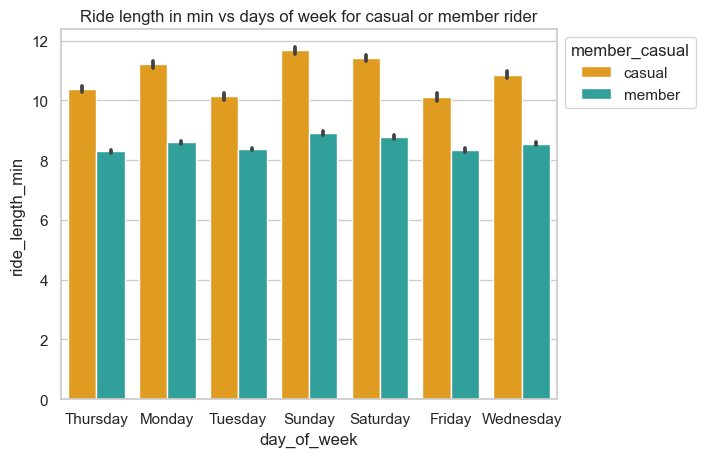

In [111]:
sns.set(style="whitegrid")
ax = sns.barplot(data = merged_trip,x = 'day_of_week', y = 'ride_length_min',hue='member_casual',palette=['orange','lightseagreen'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set( title="Ride length in min vs days of week for casual or member rider")

The average trip duration of a casual rider is more than that of a member. Note that this necessarily does not mean that casual riders travel farther distance. It is also interesting to note that weekends not only contribute to more number of trips but also longer trips on average when compared to weekdays.

In [112]:
df1 = pd.DataFrame(merged_trip.groupby(['member_casual','month'])['ride_id'].count().reset_index())
df1

,member_casual,month,ride_id
0,casual,1,10623
1,casual,2,12073
2,casual,3,45628
3,member,1,63005
4,member,2,68598
5,member,3,134838


In [113]:
df1.rename(columns = {'ride_id':'no_of_riders'}, inplace = True)

In [114]:
df1['no_of_riders'] = df1['no_of_riders'].astype(float).astype(int)
df1.sort_values(by = 'month',ascending = True)

,member_casual,month,no_of_riders
0,casual,1,10623
3,member,1,63005
1,casual,2,12073
4,member,2,68598
2,casual,3,45628
5,member,3,134838


In [115]:
months = {1:'jan',2:'feb',3:'mar'}

df1['month'] = df1['month'].apply(lambda x: months[x])

[Text(0.5, 1.0, 'Ride length in min vs months for casual or member rider')]

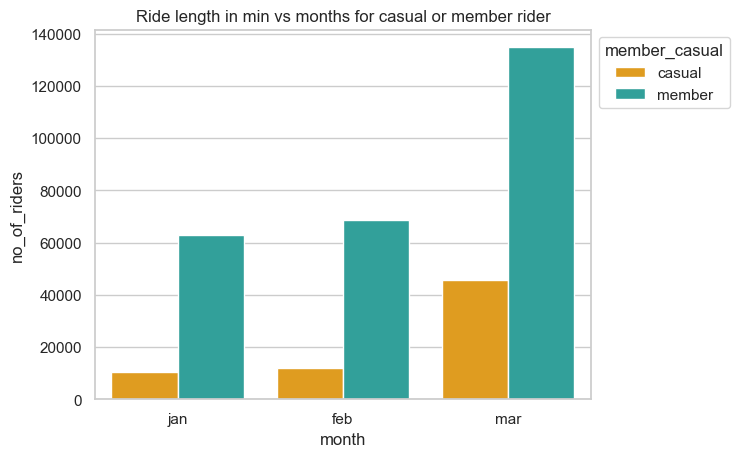

In [116]:
sns.set(style="whitegrid")
ax = sns.barplot(data = df1,x = 'month', y = 'no_of_riders',hue='member_casual',palette=['orange','lightseagreen'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set( title="Ride length in min vs months for casual or member rider")

The number of casual riders and member riders are comparatively very less in the month of Jan and Feb but it get increased in the month of March or we can say it get significantly doubled in summer.

In [117]:
daysnum = {'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}

member_trip.loc[:, 'day_no'] = member_trip['day_of_week'].apply(lambda x: daysnum[x])

C:\Users\sreza\AppData\Local\Temp\ipykernel_3032\2992138446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_trip.loc[:, 'day_no'] = member_trip['day_of_week'].apply(lambda x: daysnum[x])


In [118]:
daysnum = {'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}

casual_trip.loc[:, 'day_no'] = casual_trip['day_of_week'].apply(lambda x: daysnum[x])

C:\Users\sreza\AppData\Local\Temp\ipykernel_3032\351612070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_trip.loc[:, 'day_no'] = casual_trip['day_of_week'].apply(lambda x: daysnum[x])


In [119]:
member_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min,day_no
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,Tuesday,4.35,3
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,Thursday,6.03,5
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,2022-01-11,1,2022,Tuesday,3.37,3
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member,2022-01-30,1,2022,Sunday,16.57,1
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member,2022-01-22,1,2022,Saturday,12.07,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503410,E3A68406C43058A9,classic_bike,2022-03-30 07:31:45,2022-03-30 07:40:05,Stetson Ave & South Water St,TA1308000029,Franklin St & Adams St (Temp),TA1309000008,41.886835,-87.622320,41.879434,-87.635504,member,2022-03-30,3,2022,Wednesday,8.33,4
503412,7DF0716EA46DC1E1,classic_bike,2022-03-16 07:34:25,2022-03-16 07:44:58,Stetson Ave & South Water St,TA1308000029,Franklin St & Adams St (Temp),TA1309000008,41.886835,-87.622320,41.879434,-87.635504,member,2022-03-16,3,2022,Wednesday,10.55,4
503413,B591E39220EBC4BC,classic_bike,2022-03-15 18:09:14,2022-03-15 18:20:28,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,41.884241,-87.629634,41.892278,-87.612043,member,2022-03-15,3,2022,Tuesday,11.23,3
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,2022-03-21,3,2022,Monday,10.73,2


In [120]:
casual_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min,day_no
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,Thursday,2.95,5
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,Monday,4.35,2
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,Tuesday,14.93,3
14,E119D4E6BF686601,electric_bike,2022-01-08 05:36:40,2022-01-08 05:46:40,Michigan Ave & Jackson Blvd,TA1309000002,St. Clair St & Erie St,13016,41.877849,-87.624056,41.894345,-87.622798,casual,2022-01-08,1,2022,Saturday,10.00,7
22,9D4AAF43A011FC59,electric_bike,2022-01-18 08:03:16,2022-01-18 08:08:00,California Ave & Altgeld St,15646,Milwaukee Ave & Rockwell St,13242,41.926648,-87.697661,41.920196,-87.692659,casual,2022-01-18,1,2022,Tuesday,4.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503387,000F7F3E7F984A24,docked_bike,2022-03-26 12:45:05,2022-03-26 12:57:15,Dusable Harbor,KA1503000064,Streeter Dr & Grand Ave,13022,41.886976,-87.612813,41.892278,-87.612043,casual,2022-03-26,3,2022,Saturday,12.17,7
503388,77C082A1158B9A4E,docked_bike,2022-03-14 17:21:55,2022-03-14 17:44:57,Dusable Harbor,KA1503000064,Streeter Dr & Grand Ave,13022,41.886976,-87.612813,41.892278,-87.612043,casual,2022-03-14,3,2022,Monday,23.03,2
503394,4417CF79DFA8EFA0,electric_bike,2022-03-15 17:20:06,2022-03-15 17:37:50,Indiana Ave & Roosevelt Rd,SL-005,Streeter Dr & Grand Ave,13022,41.868037,-87.623110,41.892278,-87.612043,casual,2022-03-15,3,2022,Tuesday,17.73,3
503395,FD53CC132C891259,classic_bike,2022-03-15 17:16:36,2022-03-15 17:37:43,Indiana Ave & Roosevelt Rd,SL-005,Streeter Dr & Grand Ave,13022,41.867888,-87.623041,41.892278,-87.612043,casual,2022-03-15,3,2022,Tuesday,21.12,3


In [121]:
member_trip_df = member_trip.groupby(['day_of_week','day_no'])['ride_length_min'].mean().reset_index()
member_trip_df

,day_of_week,day_no,ride_length_min
0,Friday,6,8.334339
1,Monday,2,8.601112
2,Saturday,7,8.767192
3,Sunday,1,8.914600
4,Thursday,5,8.299763
5,Tuesday,3,8.368242
6,Wednesday,4,8.551039


In [122]:
member_trip_df.sort_values(by='day_no',inplace = True)
member_trip_df

,day_of_week,day_no,ride_length_min
3,Sunday,1,8.914600
1,Monday,2,8.601112
5,Tuesday,3,8.368242
6,Wednesday,4,8.551039
4,Thursday,5,8.299763
0,Friday,6,8.334339
2,Saturday,7,8.767192


In [123]:
casual_trip_df = casual_trip.groupby(['day_of_week','day_no'])['ride_length_min'].mean().reset_index()
casual_trip_df

,day_of_week,day_no,ride_length_min
0,Friday,6,10.121989
1,Monday,2,11.199804
2,Saturday,7,11.410031
3,Sunday,1,11.671172
4,Thursday,5,10.373560
5,Tuesday,3,10.129071
6,Wednesday,4,10.863682


In [124]:
casual_trip_df.sort_values(by='day_no',inplace = True)
casual_trip_df

,day_of_week,day_no,ride_length_min
3,Sunday,1,11.671172
1,Monday,2,11.199804
5,Tuesday,3,10.129071
6,Wednesday,4,10.863682
4,Thursday,5,10.373560
0,Friday,6,10.121989
2,Saturday,7,11.410031


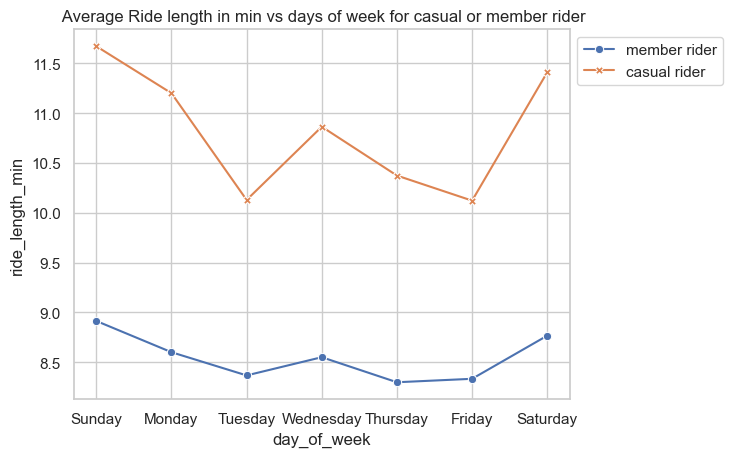

In [125]:
sns.set(style="whitegrid")
ax = sns.lineplot(data= member_trip_df, x="day_of_week", y="ride_length_min",label = 'member rider',marker='o')
ax = sns.lineplot(data= casual_trip_df, x="day_of_week", y="ride_length_min",label = 'casual rider',marker = 'X')
ax.set( title=" Average Ride length in min vs days of week for casual or member rider")
#ax.legend(loc='upper right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

The average ride length over a week of casual rider is higher than member rider and it gets significantly increases on weekend for both member and casual riders.One thing I would like to mention here is that the average ride length is always greater by casual riders than member riders even on  weekdays.

In [126]:
merged_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,Thursday,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,Monday,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,Tuesday,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,Tuesday,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,Thursday,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503412,7DF0716EA46DC1E1,classic_bike,2022-03-16 07:34:25,2022-03-16 07:44:58,Stetson Ave & South Water St,TA1308000029,Franklin St & Adams St (Temp),TA1309000008,41.886835,-87.622320,41.879434,-87.635504,member,2022-03-16,3,2022,Wednesday,10.55
503413,B591E39220EBC4BC,classic_bike,2022-03-15 18:09:14,2022-03-15 18:20:28,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,41.884241,-87.629634,41.892278,-87.612043,member,2022-03-15,3,2022,Tuesday,11.23
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,2022-03-21,3,2022,Monday,10.73
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,2022-03-13,3,2022,Sunday,8.48


In [127]:
merged_trip['time'] = merged_trip['started_at'].dt.time

C:\Users\sreza\AppData\Local\Temp\ipykernel_3032\3860065830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_trip['time'] = merged_trip['started_at'].dt.time


In [128]:
merged_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min,time
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,Thursday,2.95,11:59:47
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,Monday,4.35,08:41:56
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,Tuesday,4.35,04:53:40
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,Tuesday,14.93,00:18:04
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,Thursday,6.03,01:31:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503412,7DF0716EA46DC1E1,classic_bike,2022-03-16 07:34:25,2022-03-16 07:44:58,Stetson Ave & South Water St,TA1308000029,Franklin St & Adams St (Temp),TA1309000008,41.886835,-87.622320,41.879434,-87.635504,member,2022-03-16,3,2022,Wednesday,10.55,07:34:25
503413,B591E39220EBC4BC,classic_bike,2022-03-15 18:09:14,2022-03-15 18:20:28,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,41.884241,-87.629634,41.892278,-87.612043,member,2022-03-15,3,2022,Tuesday,11.23,18:09:14
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,2022-03-21,3,2022,Monday,10.73,15:12:17
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,2022-03-13,3,2022,Sunday,8.48,16:31:03


In [129]:
merged_trip['time'] = merged_trip['time'].astype(str)

C:\Users\sreza\AppData\Local\Temp\ipykernel_3032\4152937179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_trip['time'] = merged_trip['time'].astype(str)


In [130]:
merged_trip['hour_minute'] = merged_trip['time'].str[:2]

C:\Users\sreza\AppData\Local\Temp\ipykernel_3032\3999060094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_trip['hour_minute'] = merged_trip['time'].str[:2]


In [131]:
merged_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min,time,hour_minute
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,Thursday,2.95,11:59:47,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,Monday,4.35,08:41:56,08
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,Tuesday,4.35,04:53:40,04
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,Tuesday,14.93,00:18:04,00
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,Thursday,6.03,01:31:10,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503412,7DF0716EA46DC1E1,classic_bike,2022-03-16 07:34:25,2022-03-16 07:44:58,Stetson Ave & South Water St,TA1308000029,Franklin St & Adams St (Temp),TA1309000008,41.886835,-87.622320,41.879434,-87.635504,member,2022-03-16,3,2022,Wednesday,10.55,07:34:25,07
503413,B591E39220EBC4BC,classic_bike,2022-03-15 18:09:14,2022-03-15 18:20:28,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,41.884241,-87.629634,41.892278,-87.612043,member,2022-03-15,3,2022,Tuesday,11.23,18:09:14,18
503414,1CEE41690C73108B,classic_bike,2022-03-21 15:12:17,2022-03-21 15:23:01,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,member,2022-03-21,3,2022,Monday,10.73,15:12:17,15
503416,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,2022-03-13,3,2022,Sunday,8.48,16:31:03,16


In [132]:
time_df = merged_trip.groupby('hour_minute')['ride_id'].count().reset_index()

In [133]:
time_df

,hour_minute,ride_id
0,00,2658
1,01,1864
2,02,1131
3,03,696
4,04,908
5,05,4278
6,06,9684
7,07,19336
8,08,23110
9,09,14646


In [137]:
time_df.rename(columns={'hour_minute': 'time','ride_id':'number of riders'}, inplace=True)

In [138]:
time_df

,time,number of riders
0,00,2658
1,01,1864
2,02,1131
3,03,696
4,04,908
5,05,4278
6,06,9684
7,07,19336
8,08,23110
9,09,14646


[Text(0.5, 1.0, 'Number of riders at certain time in a day')]

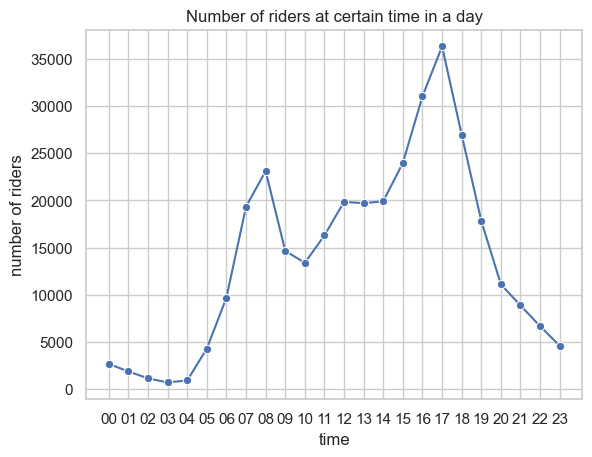

In [139]:
sns.set(style="whitegrid")
ax = sns.lineplot(data= time_df, x="time", y="number of riders",marker = 'o')


ax.set( title= "Number of riders at certain time in a day")
#ax.legend(loc='upper right')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Total number of riders increases between 2 pm to 6 pm means people prefer to take bike ride in mostly evening time in the whole day and gradually decreases with the sunset.

In [140]:
member_trip = merged_trip[merged_trip['member_casual']=='member']
member_trip.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min,time,hour_minute
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,1,2022,Tuesday,4.35,04:53:40,04
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,1,2022,Thursday,6.03,01:31:10,01
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,2022-01-11,1,2022,Tuesday,3.37,18:48:09,18
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member,2022-01-30,1,2022,Sunday,16.57,18:32:52,18
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member,2022-01-22,1,2022,Saturday,12.07,12:20:02,12


In [141]:
casual_trip = merged_trip[merged_trip['member_casual']=='casual']
casual_trip.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day_of_week,ride_length_min,time,hour_minute
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,1,2022,Thursday,2.95,11:59:47,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,1,2022,Monday,4.35,08:41:56,08
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,1,2022,Tuesday,14.93,00:18:04,00
14,E119D4E6BF686601,electric_bike,2022-01-08 05:36:40,2022-01-08 05:46:40,Michigan Ave & Jackson Blvd,TA1309000002,St. Clair St & Erie St,13016,41.877849,-87.624056,41.894345,-87.622798,casual,2022-01-08,1,2022,Saturday,10.00,05:36:40,05
22,9D4AAF43A011FC59,electric_bike,2022-01-18 08:03:16,2022-01-18 08:08:00,California Ave & Altgeld St,15646,Milwaukee Ave & Rockwell St,13242,41.926648,-87.697661,41.920196,-87.692659,casual,2022-01-18,1,2022,Tuesday,4.73,08:03:16,08


In [142]:
member_trip_df = member_trip.groupby('hour_minute')['ride_id'].count().reset_index()

In [143]:
member_trip_df

,hour_minute,ride_id
0,00,1697
1,01,1102
2,02,689
3,03,429
4,04,703
5,05,3771
6,06,8652
7,07,17289
8,08,20494
9,09,12493


In [144]:
casual_trip_df = casual_trip.groupby('hour_minute')['ride_id'].count().reset_index()

In [145]:
casual_trip_df

,hour_minute,ride_id
0,00,961
1,01,762
2,02,442
3,03,267
4,04,205
5,05,507
6,06,1032
7,07,2047
8,08,2616
9,09,2153


In [146]:
member_trip_df.rename(columns={'hour_minute': 'time','ride_id':'number of riders'}, inplace=True)
casual_trip_df.rename(columns={'hour_minute': 'time','ride_id':'number of riders'}, inplace=True)

In [147]:
member_trip_df

,time,number of riders
0,00,1697
1,01,1102
2,02,689
3,03,429
4,04,703
5,05,3771
6,06,8652
7,07,17289
8,08,20494
9,09,12493


In [148]:
casual_trip_df

,time,number of riders
0,00,961
1,01,762
2,02,442
3,03,267
4,04,205
5,05,507
6,06,1032
7,07,2047
8,08,2616
9,09,2153


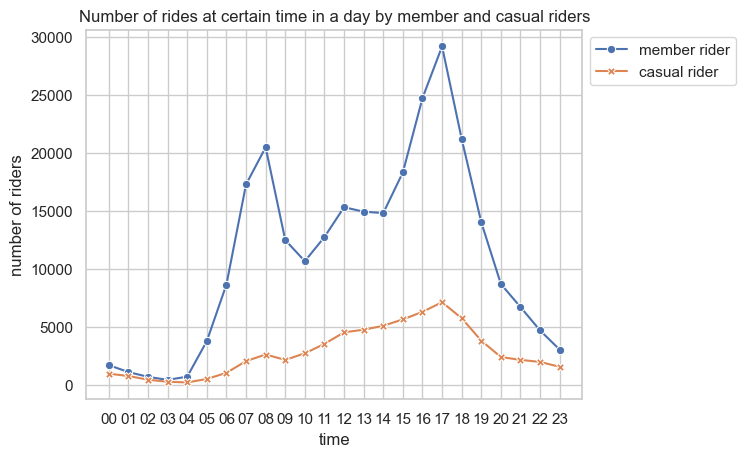

In [149]:
sns.set(style="whitegrid")
ax = sns.lineplot(data= member_trip_df, x="time", y="number of riders",label = 'member rider',marker = 'o')
ax = sns.lineplot(data= casual_trip_df, x="time", y="number of riders",label = 'casual rider',marker ='X')
ax.set( title= "Number of rides at certain time in a day by member and casual riders")
ax.legend(loc='upper right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

The number of member riders has great variation with the time in a day and their peak time is between 2 pm to 5 pm while the number of casual rider shows little variation and it increases with the time till evening with thier peak time is between 12 pm to 5 pm 

In [150]:
merged_trip['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [151]:
type_member_df = member_trip.groupby('rideable_type')['ride_id'].count().reset_index()

In [152]:
type_member_df

,rideable_type,ride_id
0,classic_bike,179206
1,electric_bike,87235


In [153]:
type_casual_df = casual_trip.groupby('rideable_type')['ride_id'].count().reset_index()

In [154]:
type_casual_df

,rideable_type,ride_id
0,classic_bike,35515
1,docked_bike,4898
2,electric_bike,27911


In [155]:
type_member_df.rename(columns={'rideable_type': 'bike_type','ride_id':'number of riders'}, inplace=True)
type_casual_df.rename(columns={'rideable_type': 'bike_type','ride_id':'number of riders'}, inplace=True)

In [156]:
type_member_df

,bike_type,number of riders
0,classic_bike,179206
1,electric_bike,87235


In [157]:
type_casual_df

,bike_type,number of riders
0,classic_bike,35515
1,docked_bike,4898
2,electric_bike,27911


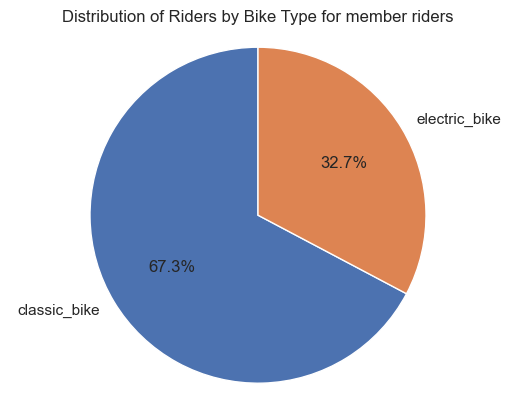

In [158]:

sns.set(style="whitegrid")

# Create pie plot using Matplotlib
fig, ax = plt.subplots()
ax.pie(type_member_df['number of riders'], labels=type_member_df['bike_type'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Riders by Bike Type for member riders')

plt.show()

Classic bike is more favourable among member riders which show 67.3% and electric bike is used by 32.7% member rider.It means docked bike is completely not used by member user.

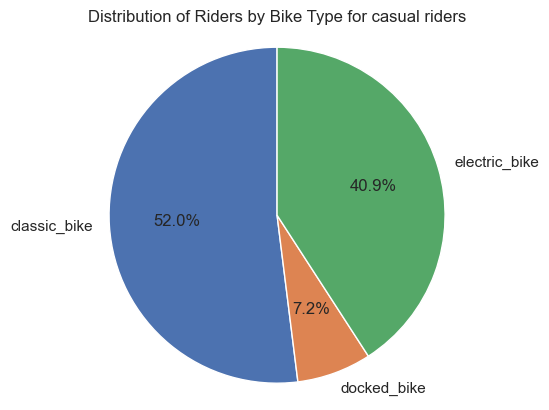

In [162]:

sns.set(style="whitegrid")

fig, ax = plt.subplots()
ax.pie(type_casual_df['number of riders'], labels=type_casual_df['bike_type'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribution of Riders by Bike Type for casual riders')

plt.show()


Classic bike is more favourable among casual riders too same as member riders which shows 52% then electric bike is used by 41% and docked bike used by 7.2% casual rider.It means docked bike is somewhat used by casual riders.

### Act

Key Takeaways
Casual riders made 20.5% of total trips between Jan'2022 - Mar'2022. Member riders make up 79.5% of total trips contribution<br>

The mean trip duration of member riders 8.5 min which is slightly lower than the mean trip duration of all trips, while it is exactly the opposite for casual riders, whose mean trip duration is 11 min which higher than the the mean trip duration of all trips. This tells us that casual riders usually take the bikes out for a longer duration compared to members.<br>

It is also interesting to note that weekends not only contribute to more number of trips but also longer trips on average when compared to weekdays.

Casual riders use bikeshare services more during weekends, while members use them consistently over the entire week.

The number of casual riders and member riders are comparatively very less in the month of Jan and Feb but it get increased in the month of March or we can say it get significantly doubled in summer.

Total number of riders increases between 2 pm to 6 pm means people prefer to take bike ride in mostly evening time in the whole day and gradually decreases with the sunset.

The number of member riders has great variation with the time in a day and their peak time is between 2 pm to 5 pm while the number of casual rider shows little variation and it increases with the time till evening with thier peak time is between 12 pm to 5 pm.

Classic bike is more favourable among member riders which show 67.3% and electric bike is used by 32.7% member rider.It means docked bike is completely not used by member user.

Classic bike is more favourable among casual riders too same as member riders which shows 52% then electric bike is used by 41% and docked bike used by 7.2% casual rider.It means docked bike is somewhat used by casual riders.


### Suggestion

We can provide attractive promotions for casual riders on weekdays so that casual members use the bikeshare services more uniformly across the entire week.

Offer discounted membership fee for renewals after the first year. It might nudge casual riders to take up membership.

Offer discounted pricing during non-busy hours so that casual riders might choose to use bikes more often and level out demand over the day.

Promote as Commitment to Health and Environment: Buying an annual membership might be a personal commitment to ride more often, thereby increasing physical activity and reducing one's carbon footprint.It can be a good startegy to make casual riders as member.

Membership can beneficial in avoiding surge pricing as some services have dynamic pricing based on demand. With an annual membership, riders don’t have to worry about paying more during peak times.

### Additonal data that could expand scope of analysis
Occupation of member riders - this data could be used to target non-members who come under similar occupation

Age and gender profile - Again, this data could be used to study the category of riders who can be targeted for attracting new members.

Pricing details for members and casual riders - Based on this data, we might be to optimize cost structure for casual riders or provide discounts without affecting the profit margin.

Address/ neighborhood details of members to investigate if there are any location specific parameters that encourage membership.